# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
measles = read_csv(
  'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
  col_types = cols()
)
head(measles)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here

df1= measles |> filter(measles$mmr >=0) |> group_by (state) |> summarize(df_vacc_rates=sum(measles$mmr >= 95,na.rm=TRUE)/n())|> arrange(df_vacc_rates)
df1

state,df_vacc_rates
<chr>,<dbl>
California,2.353884
Illinois,4.356492
New York,8.050974
Ohio,11.471052
Washington,16.928210
Pennsylvania,17.268695
Minnesota,21.019460
Colorado,22.218978
Arizona,28.594364


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [ ]:
#California

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


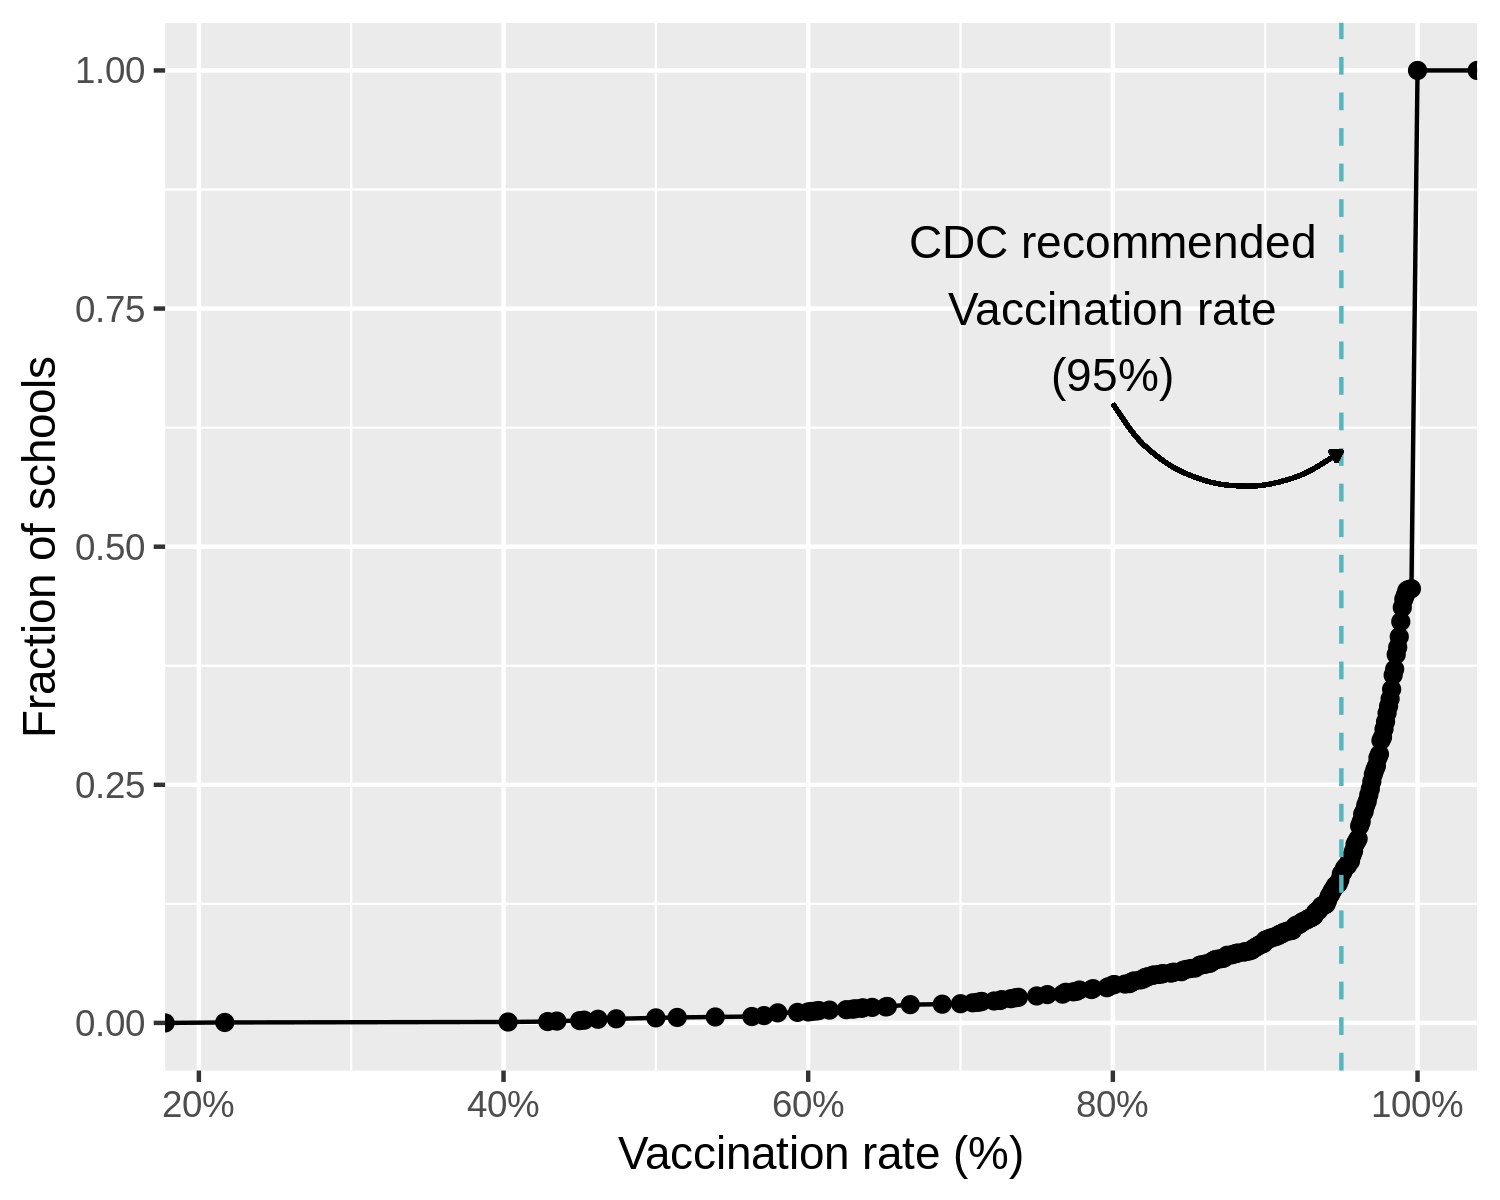

In [4]:
CDC_95  = measles |> 
  filter(state == 'North Carolina', measles$overall >=0) |> 
  summarize(quant95 = quantile(measles$overall, 0.95))

measles  |>filter(measles$state == 'North Carolina', measles$overall >=0) |>
  select(state, overall) |> mutate(rk = row_number() / n()) |> arrange(overall)|> 
  ggplot(aes(x=overall, y=rk)) + stat_ecdf(geom = "point") + stat_ecdf(geom = "line") +
  geom_vline(xintercept = 95, linetype = "dashed", color='#56b6be') +
  scale_x_continuous(labels = scales::percent_format(scale = 1)) +
  labs(y = "Fraction of schools", x = "Vaccination rate (%)") +
  geom_text(data = CDC_95, label = "CDC recommended\nVaccination rate\n(95%)", x=80, y=0.75) +
  geom_curve(aes(x = 80, y = 0.65, xend = 95, yend = 0.6),
             arrow = arrow(length = unit(0.01, "npc"),type="closed"),
             size = 0.5,
             angle = 90 ) 

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

In [ ]:
# ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [5]:
NC_50  = measles |> 
  filter(state == 'North Carolina') |> arrange(overall) 
median(NC_50$overall)

[1] 100

In [ ]:
#yes, the median vaccination rate for NC schools is 100 which is above the CDC recommended target.